In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Care

/content/drive/My Drive/Care


In [3]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 807 kB/s 
     |████████████████████████████████| 604 kB 49.0 MB/s 
     |████████████████████████████████| 930 kB 36.0 MB/s 
     |████████████████████████████████| 9.5 MB 35.7 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=46b0f1224ca9a1b38ffd0fbb9fd01b5c7db0cedb0118c775cc319bc912fca0ce
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [5]:
import cv2
import keras_ocr 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [6]:
# Get the image to be processed
image_path = "./image (1).png"
curr_time = 2215

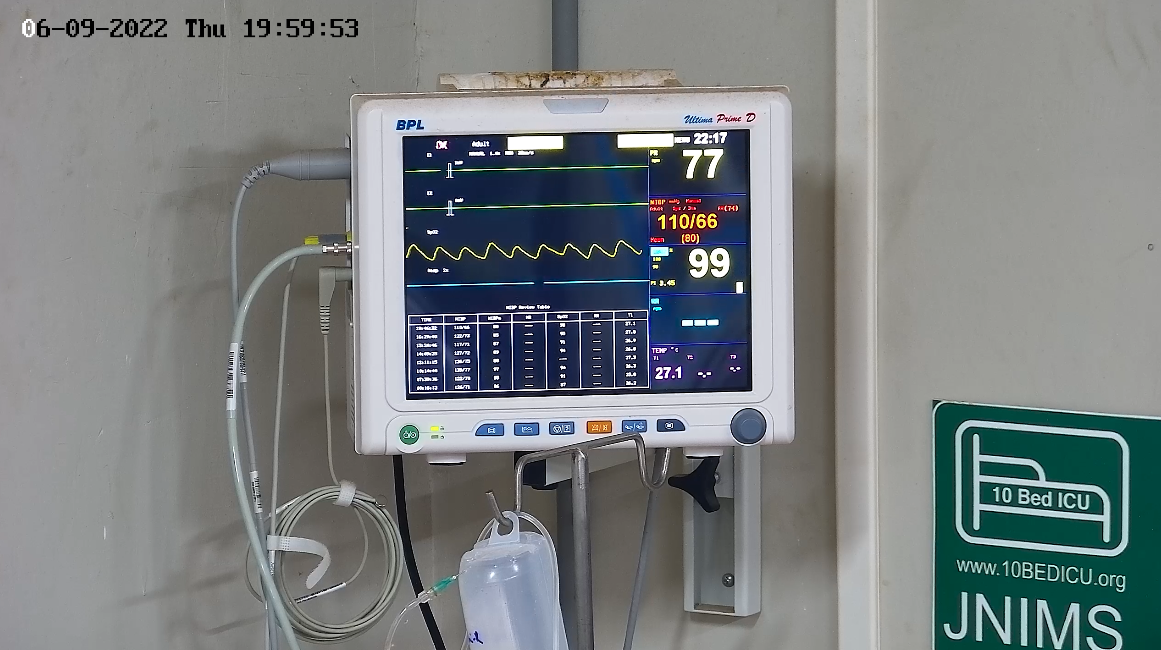

In [ ]:
# display original image
from google.colab.patches import cv2_imshow
img = cv2.imread(image_path)
cv2_imshow(img)

In [10]:
def pre_process(img_path, curr_time):
  # keras input pipeline
  images = [ keras_ocr.tools.read(path) for path in [
        image_path
  ]]

  # TODO:this is not handled correctly
  curr_time_range = [str(x) for x in range(curr_time-20, curr_time+20)]
  box_row = None
  box_col = None
  prediction_groups = pipeline.recognize(images)
  for text, box in prediction_groups[0]:
    # print(text)
    if(text in curr_time_range):
      # print(box)
      box_row = round(box[3][1])
      box_col = (round(box[0][0]-50), round(box[1][0]+30))
      # print(f"row: f{box_row}, col:{box_col}")

  if(box_row == None):
    print("Monitor is off")
    return None

  img = cv2.imread(img_path)

  # [rows, columns]
  crop = img[box_row:, box_col[0]:box_col[1]]
    
  cv2.imwrite("img-crop.png", crop)

  return "./img-crop.png"

  

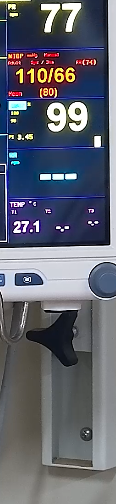

In [ ]:
cropped_image_path = pre_process(image_path, curr_time)

img = cv2.imread(cropped_image_path)
cv2_imshow(img)

In [9]:
%%time
# Full process i.e from cropping to getting data
def main():
  cropped_image_path = pre_process(image_path, curr_time)
  if cropped_image_path == None:
    print("Exiting....")
    return
  images = [ keras_ocr.tools.read(path) for path in [
        cropped_image_path
  ]]

  prediction_groups = pipeline.recognize(images)

  print("-"*20)
  headings = ["Pulse Rate", "Blood Pressure", "SpO2", "Respiratory Rate", "Temperature"]
  counter = 0
  for text, box in prediction_groups[0]:
    if(counter == 5):
      break
    if(text.isnumeric()):
      if(counter == 1):
        text_1 = text[0:3]
        text_2 = text[4:]
        print(f"{headings[counter]}: {text_1}/{text_2}")
      elif(counter == 3 and len(text) == 3):
        print(f"{headings[counter]}: None")
        counter+=1
        # print temp
        text_1 = text[0:2]
        text_2 = text[2:]
        print(f"{headings[counter]}: {text_1}.{text_2}")
      elif(counter == 4):
        text_1 = text[0:2]
        text_2 = text[2:]
        print(f"{headings[counter]}: {text_1}.{text_2}")
      else:
        print(f"{headings[counter]}: {text}")
      counter+=1
  print("-"*20)

main()

ValueError: ignored